In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import timeit

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
def minMaxScaling(data):
    scaler = MinMaxScaler()
    scaler.fit(data)
    return pd.DataFrame(data=scaler.transform(data), columns = data.columns)

In [34]:
data = pd.read_csv('preprocessedData.csv')
X = data.drop('Class', axis=1)
X = minMaxScaling(X)
y = data['Class']
data = pd.concat([X,y], axis=1)

In [13]:
X.head()

,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0.0,0.545320,0.634610,0.258055,0.627813,0.520383,0.344384,0.485403,0.678388,0.327415,...,0.451719,0.563433,0.624371,0.361607,0.583202,0.595693,0.375051,0.37538,0.468431,0.752506
1,0.0,0.552902,0.637601,0.270018,0.502106,0.670846,0.430027,0.629502,0.535526,0.254553,...,0.451719,0.563433,0.624371,0.361607,0.583202,0.595693,0.375051,0.37538,0.468431,0.752506
2,0.0,0.550633,0.638358,0.267404,0.498287,0.671194,0.426297,0.626890,0.536690,0.251666,...,0.451719,0.563433,0.624371,0.361607,0.583202,0.595693,0.375051,0.37538,0.468431,0.752506
3,0.0,0.548890,0.635509,0.262714,0.493536,0.668331,0.418368,0.653507,0.628324,0.244963,...,0.451719,0.563433,0.624371,0.361607,0.583202,0.595693,0.375051,0.37538,0.468431,0.752506
4,0.0,0.548263,0.634493,0.260681,0.492251,0.667160,0.415697,0.621934,0.532450,0.243484,...,0.451719,0.563433,0.624371,0.361607,0.583202,0.595693,0.375051,0.37538,0.468431,0.752506


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
def getErrorScoreWithVariableK() :
    errorRate = []
    for i in range(1,40):
        knn = KNeighborsClassifier(n_neighbors = i, n_jobs=-1)
        knn.fit(X_train, y_train)
        prediction = knn.predict(X_test)
#     elapsedTime = timeit.default_timer() - startTime
#     print("time taken : ",elapsedTime)
        error = np.mean(prediction != y_test)
#     print('\tError rate : ',error)
        errorRate.append(error)
    plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o',
     markerfacecolor='red', markersize=12)

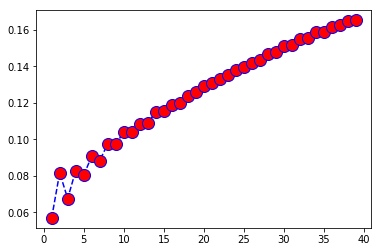

In [12]:
getErrorScoreWithVariableK()

<h3>Considering n_neighbors = 1</h3>

In [16]:
def getScoreMatrix(X_train, y_train, X_test, y_test) :
    startTime = timeit.default_timer()
    knn = KNeighborsClassifier(n_neighbors = 1, n_jobs=-1)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    elapsedTime = timeit.default_timer() - startTime
    print("time taken : ",elapsedTime)
    error = np.mean(prediction != y_test)
    print('\tError rate : ',error)
    print(confusion_matrix(y_test, prediction))
    print ('\n')
    print(classification_report(y_test, prediction))
    return error

In [45]:
datasetError = getScoreMatrix(X_train, y_train, X_test, y_test)

time taken :  13.694941731638437
	Error rate :  0.040353872419680276
[[5360   17    7    0    0]
 [  15 4708   38   97  102]
 [  48    3 5198   61    2]
 [  25    6  226 4657   10]
 [  19  243   63   58 4809]]


             precision    recall  f1-score   support

          1       0.98      1.00      0.99      5384
          2       0.95      0.95      0.95      4960
          3       0.94      0.98      0.96      5312
          4       0.96      0.95      0.95      4924
          5       0.98      0.93      0.95      5192

avg / total       0.96      0.96      0.96     25772



In [35]:
data.head()

,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,...,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11,Class
0,0.0,0.545320,0.634610,0.258055,0.627813,0.520383,0.344384,0.485403,0.678388,0.327415,...,0.563433,0.624371,0.361607,0.583202,0.595693,0.375051,0.37538,0.468431,0.752506,1
1,0.0,0.552902,0.637601,0.270018,0.502106,0.670846,0.430027,0.629502,0.535526,0.254553,...,0.563433,0.624371,0.361607,0.583202,0.595693,0.375051,0.37538,0.468431,0.752506,1
2,0.0,0.550633,0.638358,0.267404,0.498287,0.671194,0.426297,0.626890,0.536690,0.251666,...,0.563433,0.624371,0.361607,0.583202,0.595693,0.375051,0.37538,0.468431,0.752506,1
3,0.0,0.548890,0.635509,0.262714,0.493536,0.668331,0.418368,0.653507,0.628324,0.244963,...,0.563433,0.624371,0.361607,0.583202,0.595693,0.375051,0.37538,0.468431,0.752506,1
4,0.0,0.548263,0.634493,0.260681,0.492251,0.667160,0.415697,0.621934,0.532450,0.243484,...,0.563433,0.624371,0.361607,0.583202,0.595693,0.375051,0.37538,0.468431,0.752506,1


In [18]:
scoreTable = data.corr(method='pearson')

In [36]:
data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11,Class
User,1.0,-0.014,0.07,0.19,-0.043,0.042,0.18,-0.06,0.00098,0.16,-0.049,-0.011,0.13,-0.035,-0.022,0.1,0.016,-0.068,0.0037,-0.0064,-0.038,0.041,-0.08,-0.0024,0.063,-0.056,-0.02,0.027,-0.038,-0.062,-0.046,0.04,-0.14,-0.058,-0.0055,-0.0016,0.0026,-0.031
X0,-0.014,1.0,-0.29,-0.24,0.12,-0.0091,0.033,0.11,-0.013,0.024,0.089,-0.013,0.021,0.075,-0.0042,0.028,0.038,-0.0063,0.035,0.03,-0.026,0.018,-0.01,-0.0082,0.025,-0.023,-0.013,0.0027,-0.059,0.019,0.0088,-0.013,-0.0081,-0.0059,0.014,0.0049,-0.013,0.08
Y0,0.07,-0.29,1.0,0.55,-0.0013,0.13,0.23,0.0054,0.082,0.19,0.011,0.06,0.16,0.0045,0.035,0.13,0.026,-0.0031,0.073,0.044,-0.037,0.046,0.033,-0.044,0.0072,0.09,-0.1,-0.049,0.095,-0.11,-0.043,0.037,-0.079,-0.049,0.022,-0.0012,-0.015,0.082
Z0,0.19,-0.24,0.55,1.0,0.015,0.21,0.46,0.0088,0.15,0.42,0.015,0.12,0.39,0.0025,0.1,0.34,0.049,0.052,0.25,0.069,0.02,0.19,0.055,-0.046,0.08,0.068,-0.13,-0.023,0.079,-0.16,-0.068,0.035,-0.12,-0.059,-0.002,-0.0051,0.0012,0.052
X1,-0.043,0.12,-0.0013,0.015,1.0,-0.29,-0.26,0.14,-0.051,-0.012,0.13,-0.048,-0.014,0.11,-0.047,-0.0064,0.062,-0.048,0.019,0.049,-0.049,0.013,0.011,-0.035,0.027,0.0032,-0.042,-0.012,-0.034,-0.0065,0.0013,-0.015,-0.0033,-0.00017,0.019,0.0057,-0.012,-0.011
Y1,0.042,-0.0091,0.13,0.21,-0.29,1.0,0.57,-0.028,0.11,0.18,-0.035,0.1,0.18,-0.033,0.078,0.15,-0.006,0.032,0.094,0.022,-0.018,0.054,0.015,-0.029,0.009,0.055,-0.068,-0.032,0.074,-0.076,-0.036,0.041,-0.063,-0.039,0.02,0.0075,-0.012,0.14
Z1,0.18,0.033,0.23,0.46,-0.26,0.57,1.0,-0.0092,0.18,0.46,-0.018,0.15,0.43,-0.014,0.13,0.38,0.031,0.076,0.28,0.055,0.037,0.21,0.056,-0.022,0.096,0.069,-0.097,0.00077,0.059,-0.12,-0.046,0.035,-0.11,-0.046,-0.00075,0.0029,0.003,0.09
X2,-0.06,0.11,0.0054,0.0088,0.14,-0.028,-0.0092,1.0,-0.32,-0.3,0.14,-0.063,-0.029,0.12,-0.061,-0.017,0.063,-0.046,0.028,0.046,-0.068,0.019,0.006,-0.045,0.04,0.015,-0.051,-0.0079,-0.0074,-0.034,-0.0091,-0.021,-0.016,-0.0017,0.0083,0.0075,-0.0021,-0.052
Y2,0.00098,-0.013,0.082,0.15,-0.051,0.11,0.18,-0.32,1.0,0.59,-0.06,0.13,0.19,-0.057,0.13,0.17,-0.014,0.068,0.11,0.014,0.024,0.072,0.0091,-0.0033,0.019,0.042,-0.061,-0.028,0.062,-0.071,-0.035,0.051,-0.058,-0.047,0.02,-0.00016,-0.018,0.17
Z2,0.16,0.024,0.19,0.42,-0.012,0.18,0.46,-0.3,0.59,1.0,-0.034,0.18,0.45,-0.032,0.16,0.4,0.021,0.098,0.29,0.054,0.065,0.22,0.056,-0.0044,0.11,0.076,-0.088,0.011,0.057,-0.1,-0.03,0.047,-0.093,-0.048,-0.0015,-0.0031,-0.003,0.096


In [20]:
FeatureIndices = scoreTable.index.tolist()

In [21]:
def sortDic(UnsortedDictionary):
    dicItems = [(value,key) for key,value in UnsortedDictionary.items()]
    dicItems.sort()
    dicItems.reverse()
    dicItems = {key:value for value,key in dicItems}
    return dicItems

In [22]:
FeatureScoresForTargetVariable = {}

In [23]:
for i in FeatureIndices[:-1]:
    FeatureScoresForTargetVariable[i] = scoreTable.loc[i][FeatureIndices[-1]]

In [38]:
FeatureScoresForTargetVariable = sortDic(FeatureScoresForTargetVariable)
print(FeatureScoresForTargetVariable)

{'Y2': 0.16925053174191035, 'Y3': 0.16816176528697327, 'Y4': 0.16289717042528346, 'Y1': 0.14408617107318478, 'Y9': 0.1349745218104444, 'Y8': 0.10687667686015109, 'Y5': 0.10687074586778533, 'Z2': 0.09553820893294729, 'Z1': 0.08991974012800164, 'Y0': 0.08175508541448728, 'Z3': 0.08109115357416308, 'X0': 0.08017147842008175, 'Y10': 0.07145516000279731, 'Z0': 0.05185732338127792, 'Z4': 0.049490466575036085, 'Y6': 0.04675291462017919, 'Y7': 0.04162658885270344, 'X10': 0.022087233052547645, 'X11': 0.00025865718271454247, 'Z11': -3.722219500860272e-05, 'Y11': -0.00030862511603535974, 'X1': -0.010569055952527828, 'Z10': -0.019901207762819968, 'Z5': -0.024692988704347812, 'User': -0.030714390001148447, 'X6': -0.03903813204000195, 'Z9': -0.04375779130612754, 'X5': -0.04700181825722863, 'X9': -0.05018338001612127, 'X2': -0.05239245261799236, 'X4': -0.05428359331627019, 'X3': -0.05570339240328785, 'X7': -0.07073096534391839, 'X8': -0.07609647706782345, 'Z8': -0.07631979796084415, 'Z6': -0.11827285

In [39]:
errorRate = []
#FOR CHECKING THE SCORE FOR EACH SELECTED FEATURE SUBSET
def trainTestScore(X_train, y_train, X_test, y_test):
    startTime = timeit.default_timer()
    knn = KNeighborsClassifier(n_neighbors = 1, n_jobs=-1)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    elapsedTime = timeit.default_timer() - startTime
    print("time taken : ",elapsedTime)
    error = np.mean(prediction != y_test)
    print('\tError rate : ',error)
    errorRate.append(error)
    return error

In [40]:
Features = list(FeatureScoresForTargetVariable.keys())
def selectNextBestFeature(FeatureSubset, featureIndex) :
    while featureIndex<len(Features):
        checkFeature = Features[featureIndex]
        noMatchWithAnyone = True
        if len(FeatureSubset) == 0:
            noMatchWithAnyone = True
        else:
            for feature in FeatureSubset:
                print('feature:',feature,'\tkey:',checkFeature)
                if(scoreTable.loc[str(feature)][checkFeature] >= 0.7):
                    noMatchWithAnyone = False
                    break          
        if(noMatchWithAnyone == True):
            return checkFeature, featureIndex
        featureIndex += 1

In [51]:
def scoresForFeatures(allowedError):
#     while noOfFeatures <=36:
    i = 0
    scores = []
    FinalSubset = []
    LeastError = 100
    featureIndex = -1
    noOfFeatures = 3
    while abs(LeastError - datasetError)>allowedError and featureIndex<len(Features)-1:
        while i<noOfFeatures and featureIndex<len(Features):
            Subset = FinalSubset[:]
            feature, featureIndex = selectNextBestFeature(FinalSubset, featureIndex+1 )
            Subset.append(feature)
            error = trainTestScore(X_train.loc[:,Subset], y_train, X_test.loc[:, Subset], y_test)
            if(error < LeastError):
                FinalSubset = Subset[:]
                LeastError = error
                i += 1
            print("feature subset : ",Subset, "error : ", error)
            print("\n\n\nBest feature subset : ",FinalSubset, "error : ", LeastError)
        noOfFeatures += 1
    return FinalSubset

In [58]:
bestFeatureSubset = scoresForFeatures(0.01)

time taken :  0.1889709667968873
	Error rate :  0.653849138600031
feature subset :  ['Y2'] error :  0.653849138600031



Best feature subset :  ['Y2'] error :  0.653849138600031
feature: Y2 	key: Y3
time taken :  0.18399319609852682
	Error rate :  0.311151637435977
feature subset :  ['Y2', 'Y3'] error :  0.311151637435977



Best feature subset :  ['Y2', 'Y3'] error :  0.311151637435977
feature: Y2 	key: Y4
feature: Y3 	key: Y4
time taken :  0.16872936002937422
	Error rate :  0.17678100263852242
feature subset :  ['Y2', 'Y3', 'Y4'] error :  0.17678100263852242



Best feature subset :  ['Y2', 'Y3', 'Y4'] error :  0.17678100263852242
feature: Y2 	key: Y1
feature: Y3 	key: Y1
feature: Y4 	key: Y1
time taken :  0.17494161786078166
	Error rate :  0.17713021884215427
feature subset :  ['Y2', 'Y3', 'Y4', 'Y1'] error :  0.17713021884215427



Best feature subset :  ['Y2', 'Y3', 'Y4'] error :  0.17678100263852242
feature: Y2 	key: Y9
feature: Y3 	key: Y9
feature: Y4 	key: Y9
time taken :  0.53

time taken :  2.2570736966063123
	Error rate :  0.05575818717988515
feature subset :  ['Y2', 'Y3', 'Y4', 'Y9', 'Z2', 'Z3', 'Y10', 'Z4', 'X10', 'Z10'] error :  0.05575818717988515



Best feature subset :  ['Y2', 'Y3', 'Y4', 'Y9', 'Z2', 'Z3', 'Y10', 'Z4', 'X10', 'Z10'] error :  0.05575818717988515
feature: Y2 	key: Z5
feature: Y3 	key: Z5
feature: Y4 	key: Z5
feature: Y9 	key: Z5
feature: Z2 	key: Z5
feature: Z3 	key: Z5
feature: Y10 	key: Z5
feature: Z4 	key: Z5
feature: X10 	key: Z5
feature: Z10 	key: Z5
time taken :  2.7481151315695342
	Error rate :  0.07108489833928294
feature subset :  ['Y2', 'Y3', 'Y4', 'Y9', 'Z2', 'Z3', 'Y10', 'Z4', 'X10', 'Z10', 'Z5'] error :  0.07108489833928294



Best feature subset :  ['Y2', 'Y3', 'Y4', 'Y9', 'Z2', 'Z3', 'Y10', 'Z4', 'X10', 'Z10'] error :  0.05575818717988515
feature: Y2 	key: User
feature: Y3 	key: User
feature: Y4 	key: User
feature: Y9 	key: User
feature: Z2 	key: User
feature: Z3 	key: User
feature: Y10 	key: User
feature: Z4 	key: User


In [59]:
getScoreMatrix(X_train.loc[:,bestFeatureSubset], y_train, X_test.loc[:, bestFeatureSubset], y_test)

time taken :  1.9068861057620552
	Error rate :  0.038491386000310414
[[5343   14   18    7    2]
 [  13 4706   35   72  134]
 [  62    9 5112  119   10]
 [  14   17  189 4688   16]
 [   5  153   51   52 4931]]


             precision    recall  f1-score   support

          1       0.98      0.99      0.99      5384
          2       0.96      0.95      0.95      4960
          3       0.95      0.96      0.95      5312
          4       0.95      0.95      0.95      4924
          5       0.97      0.95      0.96      5192

avg / total       0.96      0.96      0.96     25772



0.038491386000310414

<h5>The algorithm selected feature subset produces lower error compared to whole dataset while taking only 14% of the time consumed by whole dataset.</h5>
<h3>fature subset error: 0.0384</h3>
<h3>whole dataset error: 0.0403</h3>
<h3>feature subset time: 1.90</h3>
<h3>whole dataset time: 13.69</h3>
